In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from KDEpy import FFTKDE

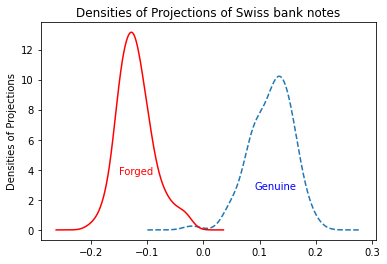

In [2]:
x = pd.read_csv("bank2.dat", sep = "\s+", header=None)
xg = x[:100]
xf = x[100:200]
mg = xg.mean(axis = 0)
mf = xf.mean(axis = 0)
m = (mf + mg)/2
w = 100 * (xg.cov() + xf.cov())
d = mg - mf
a = np.linalg.inv(w) @ d

yg = (xg - np.array([m]*100)) @ a
yf = (xf - np.array([m]*100)) @ a

xgtest = yg
sg = sum(xgtest < 0)            # Number of misclassified genuine notes

xftest = yf                     # Number of misclassified forged notes
sf = sum(xftest > 0)

fg_x, fg_y = FFTKDE(bw="silverman", kernel='gaussian').fit(np.array(yg)).evaluate()
ff_x, ff_y = FFTKDE(bw="silverman", kernel='gaussian').fit(np.array(yf)).evaluate()
                    
fig, ax = plt.subplots()
ax.plot(fg_x, fg_y, linestyle = "dashed")
ax.plot(ff_x, ff_y, c = "r")
ax.text(yf.mean()-0.03, 3.72, "Forged", color = "r")
ax.text(yg.mean()-0.03, 2.72, "Genuine", color = "blue")
plt.title("Densities of Projections of Swiss bank notes")
plt.ylabel("Densities of Projections")

plt.show()